In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [8]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


# Data Preprocessing :

# Transform Date to datetime object and Set as Index :

In [9]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
data.Date = pd.to_datetime(data.Date)
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [11]:
df = data.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [12]:
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2011, freq=None)

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


# Check for Holidays :

In [14]:
from datetime import date

data.head(1).index, data.tail(1).index

(RangeIndex(start=0, stop=1, step=1),
 RangeIndex(start=2010, stop=2011, step=1))

In [15]:
d0 = date(2012,1,3)
d1 = date(2019,12,30)
days = len(pd.date_range((d0),(d1)))
print(f'The number of days from {d0} to {d1} is {days} days')
print()
bdays = len(pd.bdate_range((d0),(d1)))
print(f'The number of business days from {d0} to {d1} is {bdays} days')
print()
print(f'The number of days from {d0} to {d1} in the given time series is {len(data)} days')

The number of days from 2012-01-03 to 2019-12-30 is 2919 days

The number of business days from 2012-01-03 to 2019-12-30 is 2085 days

The number of days from 2012-01-03 to 2019-12-30 in the given time series is 2011 days


So the time series contains holidays other than weekends.

# Create CustomBusinessDay :

In [16]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [17]:
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [18]:
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=us_cal)
print(my_range.difference(data.index))

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', length=2006, freq='C')


In [19]:
Cu = CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30', 
                                                                    '2013-03-29','2014-04-18', '2015-04-03', 
                                                                    '2016-03-25', '2017-04-14', '2018-03-30', 
                                                                    '2018-12-05', '2019-04-19'])
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=Cu)
print(my_range.difference(data.index))

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', length=1995, freq='C')


C is the custom frequency here that includes the holidays other than weekends.

In [20]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [21]:
df = df.asfreq(Cu)

In [22]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=1995, freq='C')

Now the datetime index has the frequncy C.

# Time Series Analysis :

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


Open - The open is the trader's first chance to get a look at what the trading day may hold,ranging, trending, sedate, or volatile.

High - Trading day's intraday high price.

Low - Trading day's intraday low price.

Close - The price at which the share closes at the end of trading hours of the stock market.

Adj Close - Stock's closing price after accounting for any corporate actions.

Volume - The total number of shares traded in a specified time frame.

# Considering only the closing price for the analysis :

In [23]:
df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)
df.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


# Downsampling the data to Monthly :

- It reduces the granularity in the data.

In [24]:
df_m = df.resample('M').mean()
df_m.head(),df_m.tail()

(                Close
 Date                 
 2012-01-31  61.225428
 2012-02-29  71.081572
 2012-03-31  82.501104
 2012-04-30  86.571857
 2012-05-31  80.667597,
                  Close
 Date                  
 2019-08-31  204.957728
 2019-09-30  217.994999
 2019-10-31  235.260000
 2019-11-30  262.537371
 2019-12-31  275.669496)

# Line plot :

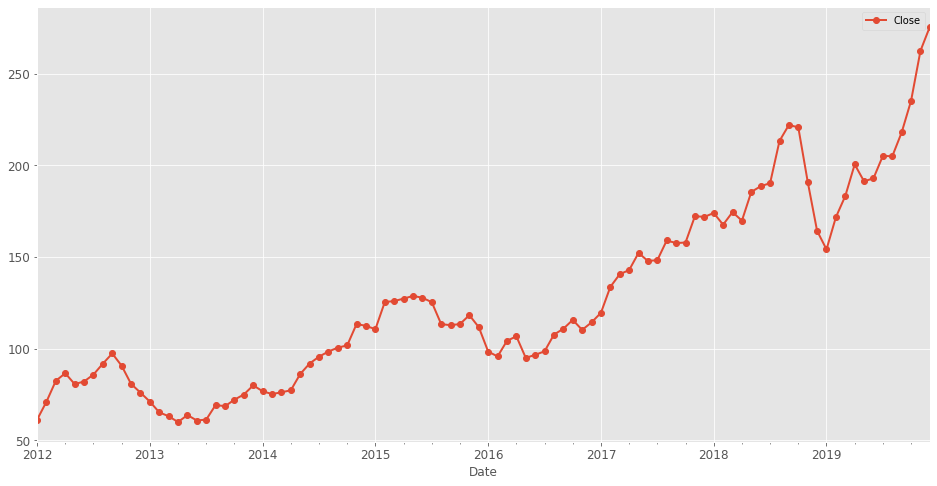

In [25]:
df_m.plot(figsize=(16,8), linewidth=2,marker='o', fontsize=12);

- Conditions for Stationarity :

1) Constant Mean

2) Constant Variance

3) No Seasonality

Check for Stationarity :

1) Visual Inspection

2) Global vs Local check

3) Statistical Tests :

- ADF(Augmented Dickey-Fuller Test

- KPPS(Kwiatkowski–Phillips–Schmidt–Shin) Test

- Visual Inspection :
From the above line plot, the mean is not constant and the variance is also not constant. Roughly, the time series don't seem to have any repeating patterns, hence no seasonality.

# Seasonal Decomposition plot :

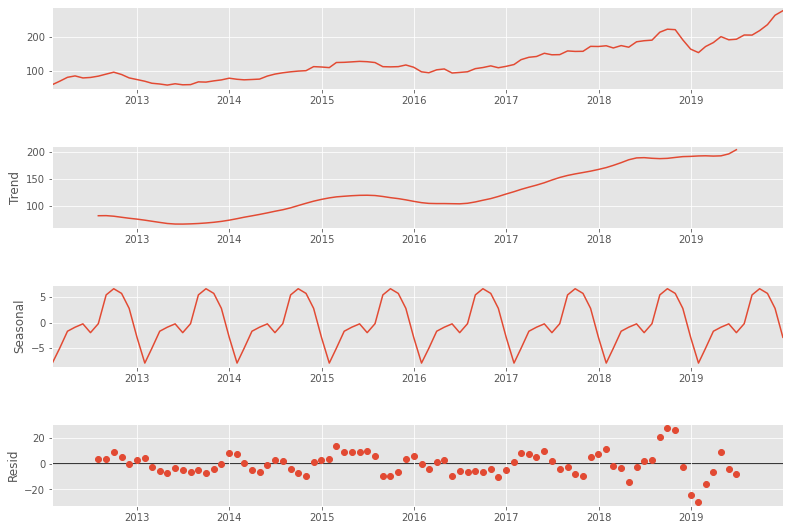

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

seas_add = seasonal_decompose(df_m, model='additive')
seas_add.plot()
plt.gcf().set_size_inches(12, 8);

- Repeating patterns are seen. It shows yearly seasonality.

- Augmented Dickey-Fuller Test :
- Null Hypothesis - Time series has unit root, hence not stationary

- Alternate Hypothesis - Time series has no unit root, hence stationary

- If p-value is less than 0.05, reject Null Hypothesis

- If p-value is greater than 0.05, fail to reject Null Hypothesis

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
def test_stationarity(series):
    
    stat_test = adfuller(series,autolag='AIC')

    print('Test Statistic : ',stat_test[0])
    print('p value : ',stat_test[1])
    print('Number of Lags : ',stat_test[2])
    print('Critical values : ')
    for key, val in stat_test[4].items():
        print('\t',key, ': ',val)
    print()    
    if stat_test[1] > 0.05:
        print('Series is non-stationary')
    else:
        print('Series is stationary')

In [29]:
test_stationarity(df_m)

Test Statistic :  0.5119654984597579
p value :  0.9852322761789652
Number of Lags :  1
Critical values : 
	 1% :  -3.5019123847798657
	 5% :  -2.892815255482889
	 10% :  -2.583453861475781

Series is non-stationary


In [30]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


# Check the order of non-seasonal differencing needed :

In [31]:
import pmdarima as pm

In [32]:
diff = pm.arima.ndiffs(df_m['Close'],max_d=4)
print(f'Order of non-seasonal Differencing = {diff}')

Order of non-seasonal Differencing = 1


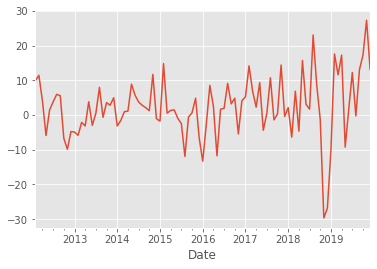

In [33]:
dfm_lag = df_m['Close'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna()
dfm_lag.plot();

In [34]:
diff1 = pm.arima.ndiffs(dfm_lag,max_d=4)
print(f'Order of non-seasonal Differencing = {diff1}')

Order of non-seasonal Differencing = 0


In [35]:

test_stationarity(dfm_lag)

Test Statistic :  -6.549178388231945
p value :  8.940119318440014e-09
Number of Lags :  0
Critical values : 
	 1% :  -3.5019123847798657
	 5% :  -2.892815255482889
	 10% :  -2.583453861475781

Series is stationary


- The series is trend stationary now.

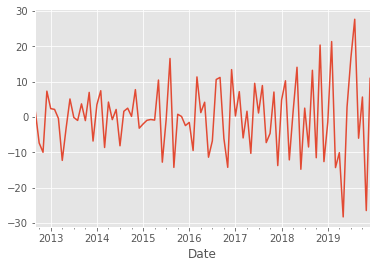

In [36]:
dfm_lag_se = dfm_lag.rolling(window=8).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna()
dfm_lag_se.plot();

In [37]:
test_stationarity(dfm_lag_se)

Test Statistic :  -5.983007792223137
p value :  1.8196351010034696e-07
Number of Lags :  7
Critical values : 
	 1% :  -3.5148692050781247
	 5% :  -2.8984085156250003
	 10% :  -2.58643890625

Series is stationary


- The p value is very low and the test statistic is less than 1% critical value. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

- Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

# Exploratory Data Analysis :

In [38]:
d = df_m.copy()

# Separating month and date into separate column

d["month"] = d.index.strftime("%B") # month extraction
d["year"] = d.index.strftime("%Y") # year extraction
d['Q'] = d.index.quarter    # quarter extraction

# categorizing the quarters
d.loc[d['Q']==1,'quarter']='Q1'
d.loc[d['Q']==2,'quarter']='Q2'
d.loc[d['Q']==3,'quarter']='Q3'
d.loc[d['Q']==4,'quarter']='Q4'

d.head(12)

,Close,month,year,Q,quarter
Date,,,,,
2012-01-31,61.225428,January,2012,1,Q1
2012-02-29,71.081572,February,2012,1,Q1
2012-03-31,82.501104,March,2012,1,Q1
2012-04-30,86.571857,April,2012,2,Q2
2012-05-31,80.667597,May,2012,2,Q2
2012-06-30,82.080340,June,2012,2,Q2
2012-07-31,85.866871,July,2012,3,Q3
2012-08-31,91.813727,August,2012,3,Q3
2012-09-30,97.366918,September,2012,3,Q3


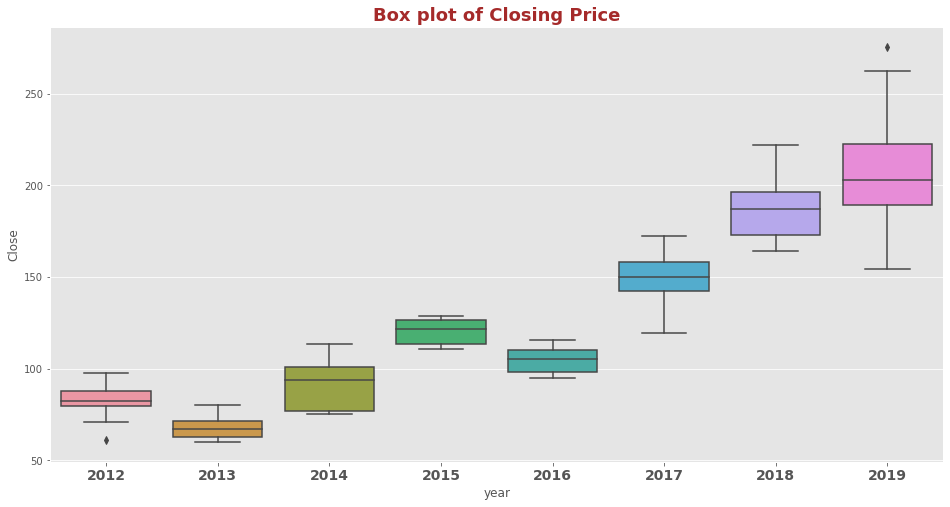

In [39]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14,fontweight='bold')
sns.boxplot(x="year",y="Close",data=d)
plt.title('Box plot of Closing Price',fontweight='bold',fontsize=18,color='brown');

- As seen in the plot the mean is not constant over the years, which proves the time series is not stationary. There is an outlier below lower whisker in the year 2012 which indicates the price was lower than minimum at some instance and there is an outlier on the higher side in the year 2019 which indicates the value of stock had gone up more than the maximum at an instance.

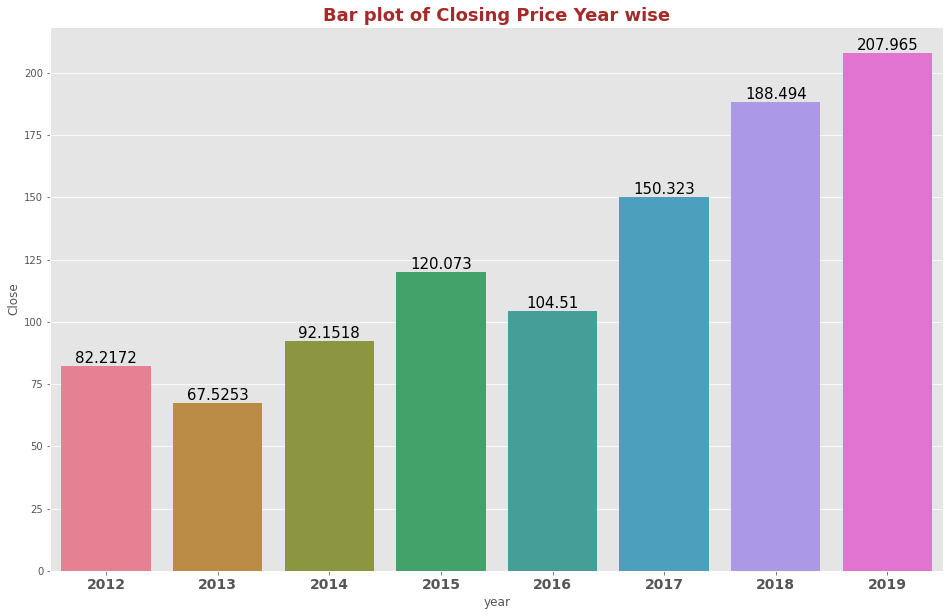

In [40]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='year',y='Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Bar plot of Closing Price Year wise',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

- The bars represent the frequencies of distinct values of stock price. In the above plot, we can see after a few ups and downs from 2012 to 2016 the apple stock price has increased largely since 2017 and overall there is a upward trend.

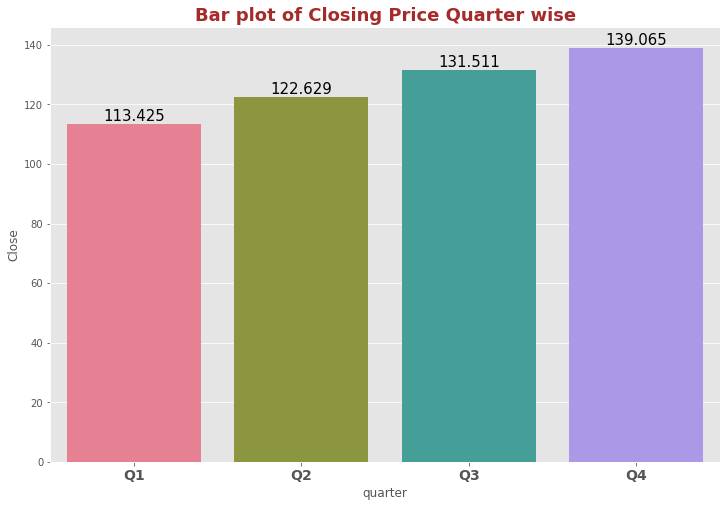

In [41]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=d,x='quarter',y='Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Bar plot of Closing Price Quarter wise',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

- The quarter plot shows a clear upward trend .

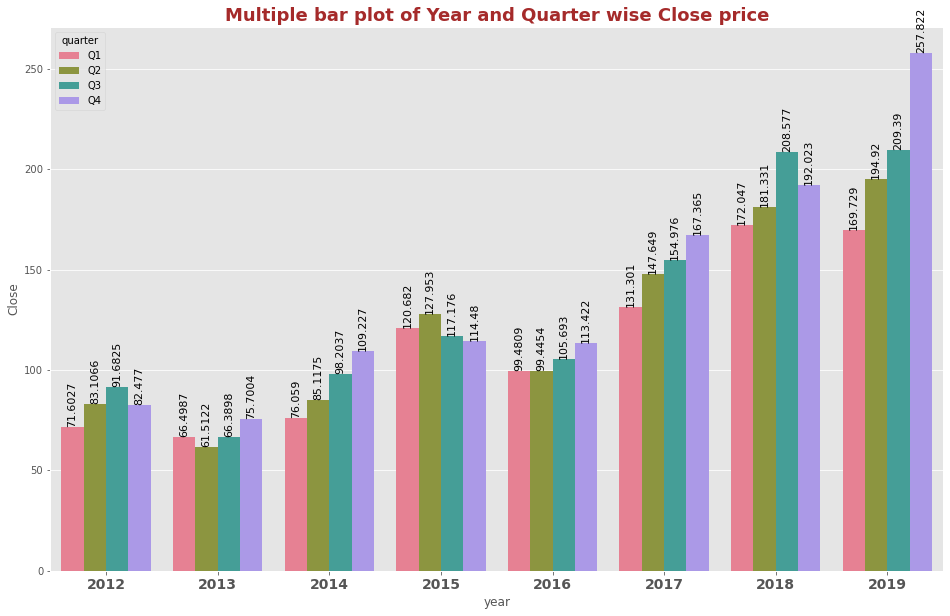

In [42]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='year',y='Close',palette='husl',hue='quarter',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Multiple bar plot of Year and Quarter wise Close price',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=11,rotation=90)

- here is a steep increase in the adj closing price of stocks in the last quarter of year 2019 whcih will possibly have greater impact in the prices of the coming year.

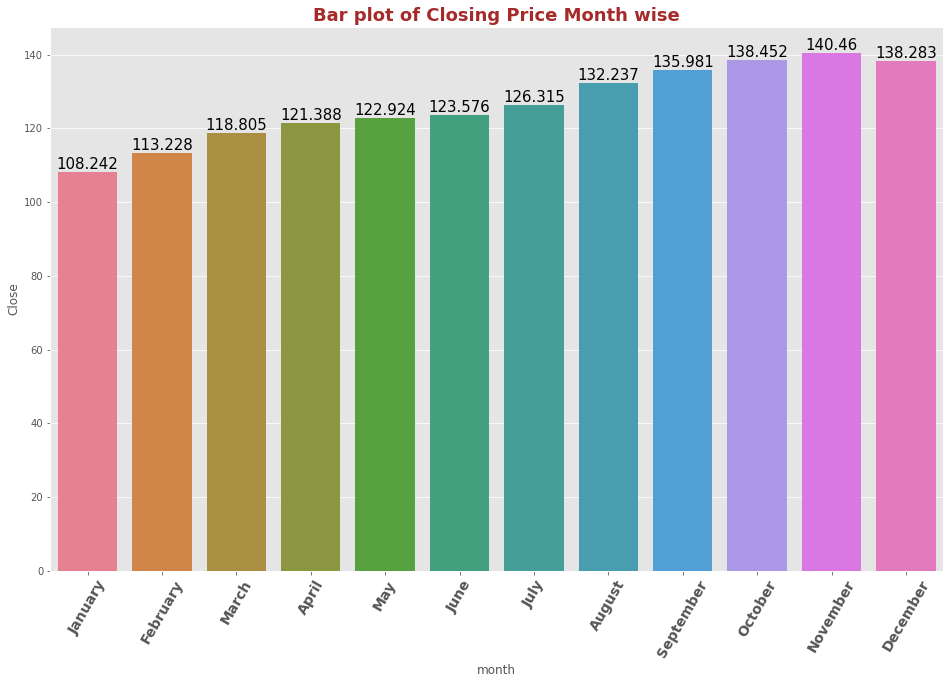

In [43]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='month',y='Close',palette='husl',ci=None)
plt.xticks(rotation=60,fontsize=14,fontweight='bold')
plt.title('Bar plot of Closing Price Month wise',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

- The adj close price is higher in the month of November followed by December and October. This must be due to soaring of stock price in the last quarter of the year 2019 which we saw above.

# Pivot table for year and quarter :

In [44]:
d_pivot = d.pivot_table(values='Close', index='year', columns='quarter')
d_pivot

quarter,Q1,Q2,Q3,Q4
year,,,,
2012,71.602701,83.106598,91.682505,82.477047
2013,66.498682,61.512177,66.389781,75.700359
2014,76.059047,85.117529,98.203716,109.227088
2015,120.681505,127.953248,117.175945,114.480385
2016,99.480906,99.445361,105.692953,113.422071
2017,131.300678,147.648643,154.976435,167.365310
2018,172.046792,181.330844,208.577068,192.022681
2019,169.729298,194.919609,209.389697,257.822289


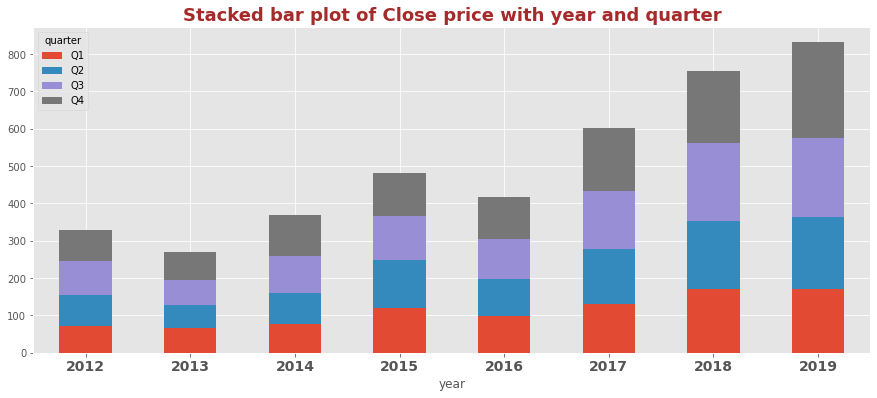

In [45]:
d_pivot.plot(kind='bar',stacked=True,figsize=(15,6))
plt.title('Stacked bar plot of Close price with year and quarter',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

- The plot shows the yearly raising trend of stock price along with the quarters. The year 2013 has the lowest stock price in all quarters.

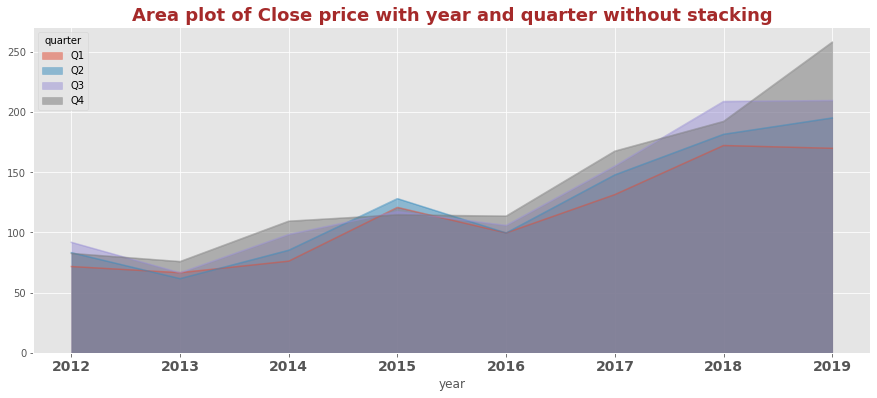

In [46]:
d_pivot.plot(kind='area',stacked=False,figsize=(15,6))
plt.title('Area plot of Close price with year and quarter without stacking',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

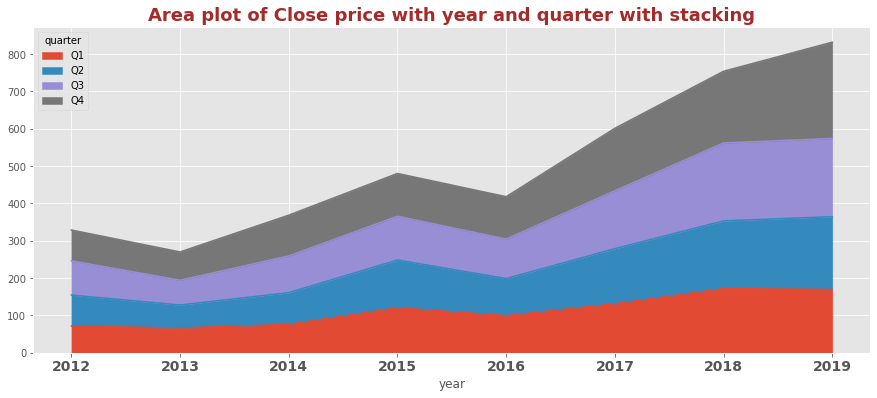

In [47]:
d_pivot.plot(kind='area',stacked=True,figsize=(15,6))
plt.title('Area plot of Close price with year and quarter with stacking',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

- Both the plots show how the last quarter of 2019 has larger area indicating soaring stock price.

# Pivot table for year and month 

In [48]:
d_pivot2 = d.pivot_table(values='Close', index='year', columns='month')
d_pivot2

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2012,86.571857,91.813727,76.007857,71.081572,61.225428,85.866871,82.080340,82.501104,80.667597,80.774500,90.648785,97.366918
2013,59.966428,69.263376,79.951088,65.258422,71.117483,61.308182,60.791143,63.120143,63.778961,74.987067,72.162922,68.597786
2014,77.296327,98.436667,112.411364,75.225714,76.777959,95.625909,91.885443,76.173468,86.170817,113.484444,101.785455,100.548572
2015,127.291428,113.394762,111.726818,125.432105,110.641501,125.335455,127.806817,125.970908,128.761500,118.270526,113.443810,112.797619
2016,106.739048,107.665218,114.335714,95.746500,98.428946,98.556500,96.622273,104.267273,94.974762,110.240500,115.690000,110.857142
2017,142.886842,159.021306,171.891500,133.714209,119.570000,148.299499,147.831362,140.617826,152.227726,172.293001,157.911429,157.608500
2018,169.834287,213.346089,164.266317,167.638947,174.005237,190.311429,188.621429,174.496192,185.536818,191.089000,220.712727,222.073685
2019,200.516191,204.957728,275.669496,171.727893,154.166190,205.216364,192.969000,183.293810,191.273637,262.537371,235.260000,217.994999


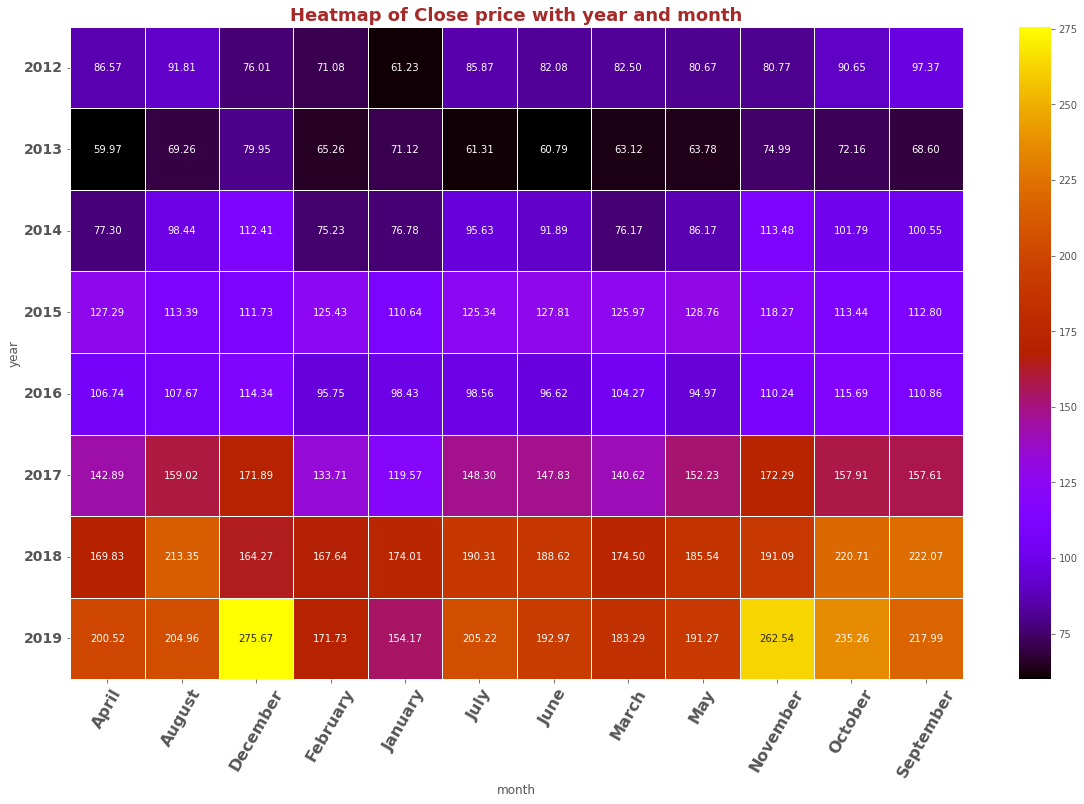

In [49]:

plt.figure(figsize=(20,12))
sns.heatmap(d_pivot2,annot=True,fmt='.2f',cmap='gnuplot',linewidths=1)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(rotation=0,fontsize=14,fontweight='bold')
plt.title('Heatmap of Close price with year and month',fontweight='bold',fontsize=18,color='brown');

- The lighter cells indicate higher values of stock price and the darker cells indicate the lower values of stock price. The yellow cell in the above plot is of 2019 December which has the highest stock price followed by November of 2019. The darker ones at the top show lower stock prices and the plot overall shows the soaring stock prices over the years.

# ACF and PACF plots :

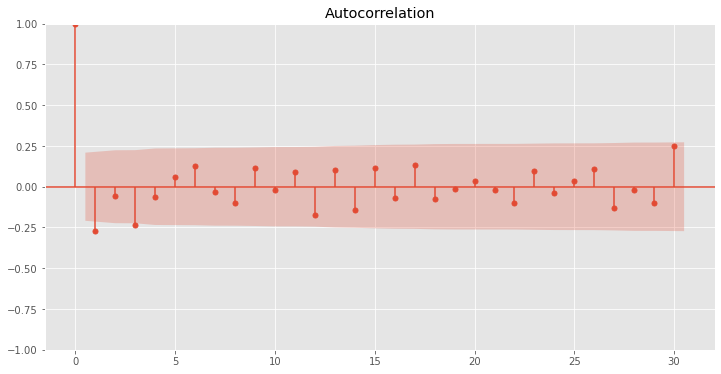

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, ax = plt.subplots(figsize=(12,6))
acf = plot_acf(dfm_lag_se,lags=30,ax=ax)

C:\Users\Vineet\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


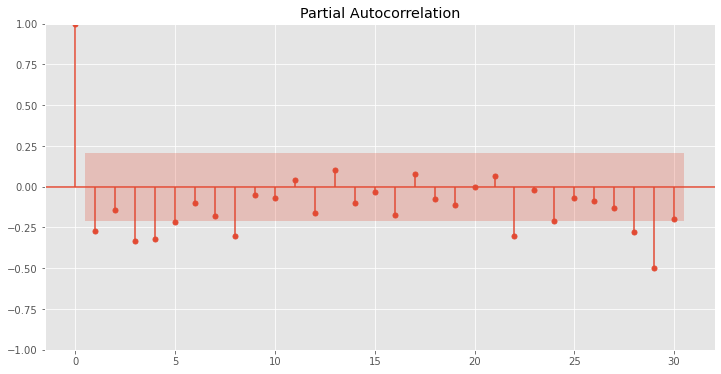

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
pacf = plot_pacf(dfm_lag_se,lags=30,ax=ax)

- In both ACF and PACF plots, it's not clear whether they are tailing off or cutting off and since the time series needed first order differencing to make it stationary and seasonality id present it is SARIMA model that has to used for forcasting. Here since in acf and pacf plot only one point in each is above the confidence band, p = 1, q = 1, d = 1 for ARIMA and P=1, Q=1, D=1 for SARIMA with seasonality s=252 as the series has holidays.

# Split into train and test data :

In [52]:
train = df.iloc[:len(df)-249]

# Taking last one year for testing
test = df.iloc[len(df)-249:]
test.head(),test.tail()

(                 Close
 Date                  
 2019-01-02  157.919998
 2019-01-03  142.190002
 2019-01-04  148.259995
 2019-01-07  147.929993
 2019-01-08  150.750000,
                  Close
 Date                  
 2019-12-23  284.000000
 2019-12-24  284.269989
 2019-12-26  289.910004
 2019-12-27  289.799988
 2019-12-30  291.519989)

# ARIMA model :

In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
model_1 = ARIMA(train,order=(1,1,1))
model_1 = model_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1746
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3621.613
Date:                Sat, 04 Feb 2023   AIC                           7249.226
Time:                        22:26:01   BIC                           7265.619
Sample:                    01-03-2012   HQIC                          7255.287
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7990      0.094     -8.474      0.000      -0.984      -0.614
ma.L1          0.8391      0.087      9.652      0.000       0.669       1.009
sigma2         3.7171      0.063     58.780      0.000       3.593       3.841
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3267.45
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
start = len(train)
end = len(train)+len(test)-1
pred1 = model_1.predict(start=start,end=end,type='levels')

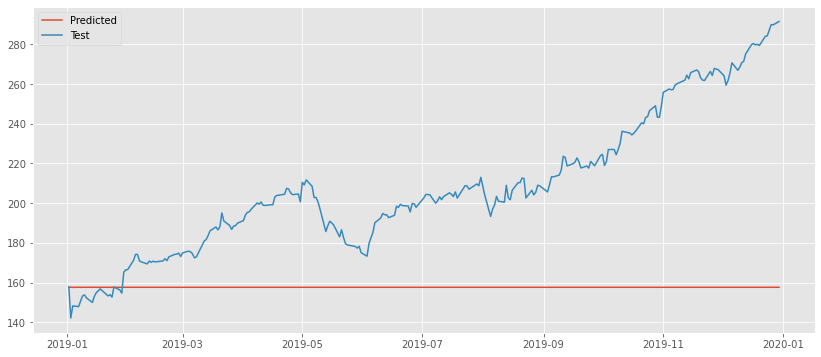

In [56]:
plt.figure(figsize=(14,6))
plt.plot(pred1, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

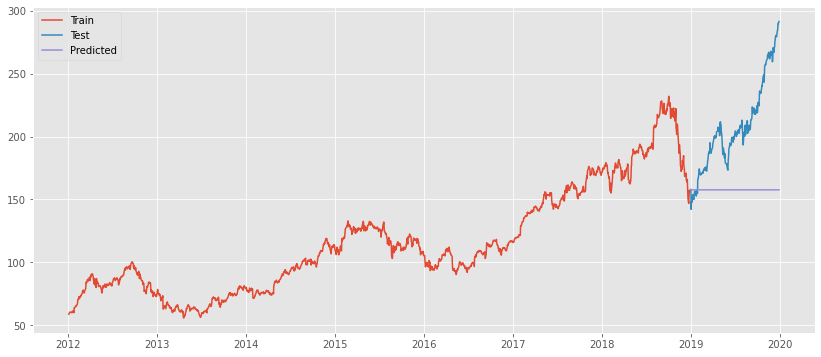

In [57]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred1, label='Predicted')
plt.legend(loc='best')
plt.show()


In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred1,test))

print('Root Mean Squared Error of ARIMA model =',rmse)

Root Mean Squared Error of ARIMA model = 60.42926805019126


# ARIMA with Seasonal order using Maximum likelihood estimation :

- - As the seasonality is large.

In [59]:
import statsmodels.api as sm

In [60]:
model_se = sm.tsa.arima.ARIMA(train,order=(1,1,1),seasonal_order=(1,1,1,251))
result = model_se.fit(method='innovations_mle',low_memory=True,cov_type='none')

C:\Users\Vineet\anaconda3\lib\site-packages\statsmodels\tsa\arima\model.py:403: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  warnings.warn('Provided `endog` series has been differenced'


In [61]:
pred2 = result.predict(start=start,end=end,type='levels')

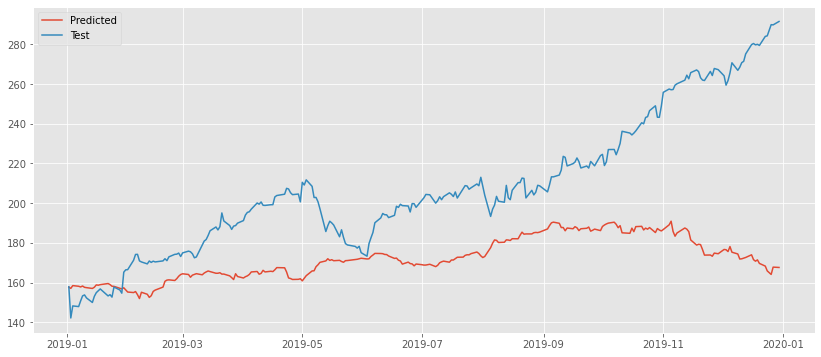

In [62]:
plt.figure(figsize=(14,6))
plt.plot(pred2, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

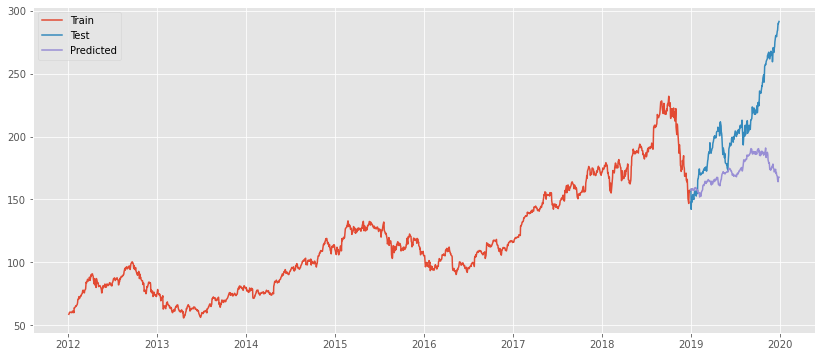

In [63]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred2, label='Predicted')
plt.legend(loc='best')
plt.show()

In [64]:
rmse2 = sqrt(mean_squared_error(pred2,test))

print('Root Mean Squared Error of ARIMA with seasonal order using innovations_mle method =',rmse2)

Root Mean Squared Error of ARIMA with seasonal order using innovations_mle method = 45.750428394094776


This model has captured seasonality and the rmse is low compared to arima model.

# Holt-Winters Triple Exponential Smoothing :

In [65]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [66]:
model_h = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=252)
model_h = model_h.fit()
model_h.summary()

C:\Users\Vineet\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Close,No. Observations:,1746
Model:,ExponentialSmoothing,SSE,5518.211
Optimized:,True,AIC,2521.168
Trend:,Multiplicative,BIC,3920.229
Seasonal:,Multiplicative,AICC,2611.043
Seasonal Periods:,252,Date:,"Sat, 04 Feb 2023"
Box-Cox:,False,Time:,22:31:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950038,alpha,True
smoothing_trend,0.0001001,beta,True


In [67]:
pred3 = model_h.predict(start=start,end=end)

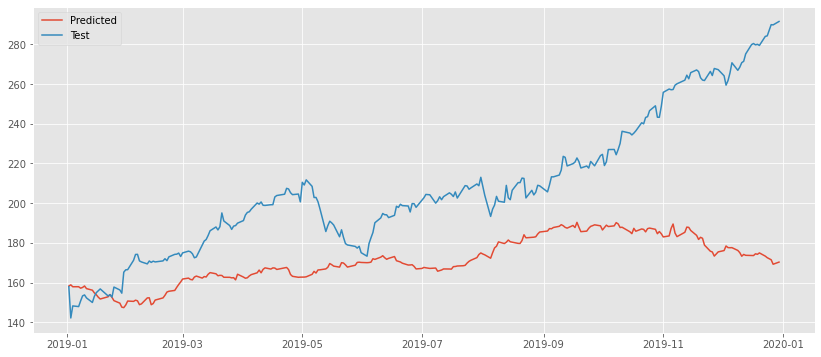

In [68]:
plt.figure(figsize=(14,6))
plt.plot(pred3, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

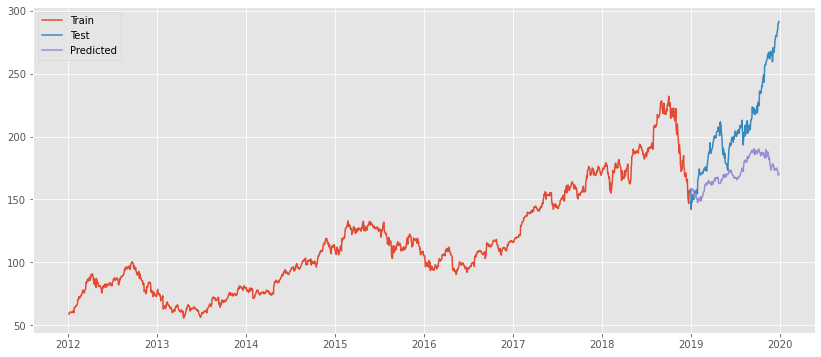

In [69]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred3, label='Predicted')
plt.legend(loc='best')
plt.show()

In [70]:
rmse3 = sqrt(mean_squared_error(pred3,test))

print('Root Mean Squared Error of ARIMA with seasonal order using innovations_mle method =',rmse3)

Root Mean Squared Error of ARIMA with seasonal order using innovations_mle method = 45.623441092817515
